<a href="https://colab.research.google.com/github/steverogersneha/Iris-Neural-Network/blob/master/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with Keras

In this tutorial, we will create a very basic neural network for image classification in Keras. 

We will use the dataset with images of clothing and try to automatically classify them in classes (clothing types).

In this tutorial, we will:
- Download and review the dataset
- Preprocessed the data
- Build the classification model
- Train the model
- Evaluate the model and observe the results

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## The dataset

This tutorial uses [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. The dataset contains 70,000 images of clothing.

![](https://tensorflow.org/images/fashion-mnist-sprite.png)




This dataset is available through `keras.datasets` module and is already split on training and testing dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Review the dataset

We will first check the size of the dataset.

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


How does one image look?

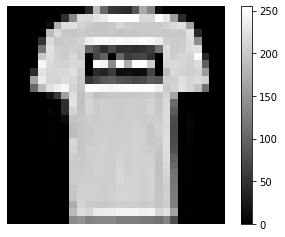

In [4]:
plt.imshow(train_images[1], cmap='gray')
plt.axis('off')
plt.colorbar()

What about labels? We plot labels for ten first image in the dataset.

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

We see that labels are numbers. Each category is represented with its number. 
For labelling purposes, we crate the list of labels which indexes correspond to numbers in the list above.

In [6]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

## Preprocess images

Data must be preprocessed before training the neural network, which improves the learning process. More about reasons for preprocessing can be found [here](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [9]:
train_images_preprocessed = train_images / 255
test_images_preprocessed = test_images / 255

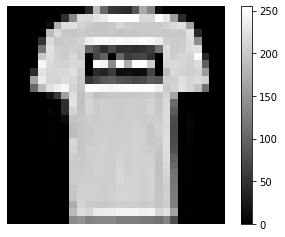

In [8]:
plt.imshow(train_images[1], cmap='gray')
plt.axis('off')
plt.colorbar()

## Building the model

We will first chose and connect layers and then compile the model to make it ready for training.

We decided to make our network simple. It will have only two dense layers.

![](https://victorzhou.com/media/nn-series/network.svg)

In [10]:
train_images_preprocessed.reshape(60000,784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Training the model

We will use the training part of the dataset to train the model

In [11]:
ly = [
      layers.Flatten(input_shape = (28,28)),
      layers.Dense(128, activation = "relu"),
      layers.Dense(10, activation = "softmax"),
     ]

# Model evaluation and predicting

We want to know how accurate is the model we trained on the test data. 

In [20]:
model = Sequential(ly)
model.compile(optimizer = 'adam', loss = keras.losses.SparseCatagoricalCrossentropy(),metrices=["accuracy"],)
model.summery()

AttributeError: ignored

Here we implement two functions to show the results:

In [ ]:
def plot_image(i, predictions, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(
        "{} ({})".format( class_names[predicted_label], class_names[true_label]), 
        color=color
    )
                                
def plot_histogram(i, predictions, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions[i])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Now we can use those function to inspect a few predictions visually:

# Is the model trained enough?

We can plot the training and the test accuracy. We are overfitting the model on the training data when test accuracy does not improve anymore or even decrease.